In [1]:
%matplotlib inline

In [2]:
import bokeh.plotting
from bokeh.plotting import figure, output_file, show, output_notebook

import numpy
import numpy as np

import scipy
import scipy as sp
from scipy.spatial import ConvexHull
import scipy.ndimage
import scipy.ndimage as spim

import skimage.measure
from skimage.measure import find_contours

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot
import matplotlib.pyplot as plt

import nanshe

output_notebook()

Loading BokehJS ...

In [3]:
# Raw data to use.

a = np.zeros((16, 17), dtype=bool)
a[-2:, -3:] = 1
a[-2, -2] = 0
a[-1, -3] = 0

In [4]:
# Create an RGB layer from the mask.

ac = np.repeat(a, 4, -1).reshape(a.shape + (4,)).astype(np.uint8)
ac[..., :-1] = 0
ac *= 127
ac = ac.view(np.uint32)[..., 0]

In [5]:
# Extend the bottom portion of the mask to ensure those points are included in the contour.
# Also, pad the image with zeros to ensure we have enough room to perform the dilation and generate a contour.

st = np.zeros(a.ndim * (3,), dtype=int)
st[2, 2] = 1
st[1, 2] = 1
st[2, 1] = 1
st[1, 1] = 1

a2 = spim.binary_dilation(np.pad(a, 2, "constant"), st)

In [6]:
# Sort 2D points clockwise.
# Map the points to a polar coordinate system relative to the contour's centroid.
# Then find how they would be sorted by their angle.

ap = np.array(nanshe.util.xnumpy.generate_contour(a2).nonzero()) - 2
apc = ap.mean(axis=1)
apr = ap - apc[:, None]
apt = np.arctan2(apr[1], apr[0])
apt %= (2*np.pi)
ao = np.argsort(apt)
ap = ap[:, ao]

In [7]:
# Add the RGB image and the patch to show this works as expected.

p = figure(plot_width=400, plot_height=400, x_range=[0, a.shape[1]], y_range=[a.shape[0], 0])

a_ctr_y, a_ctr_x = tuple(ap)
p.image_rgba([np.flipud(ac)], x=0, y=a.shape[0], dw=a.shape[1], dh=a.shape[0])
p.patch(a_ctr_x, a_ctr_y, alpha=0.5, line_width=2)

show(p)

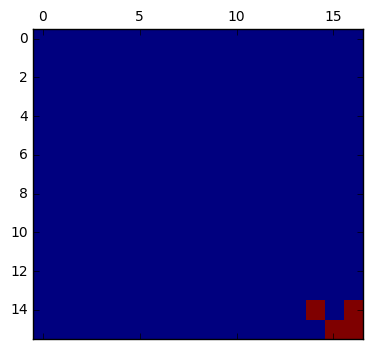

In [8]:
plt.matshow(a)
plt.show()